<a href="https://colab.research.google.com/github/Alena-Andriyash/ML_Pylieva_tasks/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%90%D0%BD%D0%B4%D1%80%D1%96%D1%8F%D1%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls drive/MyDrive/Machine\ Learning\ для\ людей/data/linear_regression


medical-charges.csv


In [ ]:
medical_df = pd.read_csv('drive/MyDrive/Machine Learning для людей/data/linear_regression/medical-charges.csv')

In [ ]:
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Завдання 1 відповідь
1) проаналізувати доступні фічі і підібрати ваги для кожної фічі, типу якщо чоловік то вартість ставити з коефіціентом і зробити стандартне базове значення, яке зміниться різних параметрах
2)розділити на категорії користувачів і для кожного зробити окрему  сумму
3)зробити балову систему і додавати бали за наприклад для курців +5, а якщо 4 дитини ще 2 і далі перерахувати і написати пропорцію, чим більше балів тим більше charges

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

# Розподіл медичних зборів (charges) у вигляді інтерактивної гістограми plotly з розбиттями за категорією sex

In [ ]:
fig = px.histogram(
                  medical_df,
                   x='charges',
                   color='sex',
                   marginal='box',
                   nbins=50,
                   title='Distribution of Sex')
fig.update_layout(bargap=0.1)
fig.show()

### Висновок
Більшість медичних витрат зосереджена в діапазоні до 15k для обох статей. Чоловіки частіше мають високі витрати (>30k) порівняно з жінками. Розкид витрат у чоловіків ширший, з більшою кількістю аномальних значень.

# # Розподіл медичних зборів (charges) у вигляді інтерактивної гістограми plotly з розбиттями за категорією region

In [ ]:
fig = px.histogram(
                  medical_df,
                   x='charges',
                   color='region',
                   marginal='box',
                   nbins=50,
                   title='Distribution of Region')
fig.update_layout(bargap=0.1)
fig.show()

### Висновок
Більшість медичних витрат у всіх регіонах зосереджена в діапазоні до 15k, причому регіони northeast та northwest демонструють найвищу щільність у цьому діапазоні. Регіон southeast вирізняється найбільшим розкидом витрат і має значну кількість аномально високих значень (>30k). Регіон northeast також демонструє випадки високих витрат, але меншою мірою. Загалом, розподіл витрат має схожі тренди в різних регіонах, але у southeast спостерігається вища ймовірність значних медичних витрат.
В першому біні бачимо, що пічнічних регіонах Southwest та Northeast значно менше користувачів, витрати до 2k можуть вказувати на планові візити, базове обслуговування можливо в цих регіонах менше роблять чекапів здоров'я

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

# Розподіл кожного з настуних стовпців відносно того, чи є людина курцем (smoker) по region

In [ ]:
fig_region_smoker = px.box(
    medical_df,
    x='region',
    y='charges',
    color='smoker',
    points='all',
    title='Distribution of Charges by Region and Smoking Status',
    labels={'region': 'Region', 'charges': 'Medical Charges', 'smoker': 'Smoker'}
)
fig_region_smoker.show()

### Висновок
Курці (smoker=yes) у всіх регіонах демонструють значно вищі медичні витрати порівняно з некурцями (smoker=no).
Медіана витрат для курців значно вища у кожному регіон
У регіонах southeast та southwest витрати серед курців найвищі, що вказує на потенційні регіональні фактори (наприклад, різниця у медичних послугах чи рівень ризиків).
Регіони northeast та northwest показують схожий розподіл, але в них трохи менше випадків екстремально високих витрат серед курців.

# Розподіл кожного з настуних стовпців відносно того, чи є людина курцем (smoker) по children

In [ ]:
fig_region_smoker = px.box(
    medical_df,
    x='children',
    y='charges',
    color='smoker',
    points='all',
    title='Distribution of Charges by Number of Children and Smoking Status',
    labels={'children': 'Number of Children', 'charges': 'Medical Charges', 'smoker': 'Smoker'}
)
fig_region_smoker.show()

### Висновок
Кількість дітей майже не впливає на медичні витрати, особливо серед курців, де витрати залишаються стабільно високими. Некурці демонструють низькі та стабільні витрати незалежно від кількості дітей.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

# Звʼязок між стовпцем charges та children використовуючи графіки-скрипки (px.violin)

In [ ]:
fig_children_charges = px.violin(
    medical_df,
    x='children',
    y='charges',
    box=True,         # Додати бокс-плоти всередині
    points='all',     # Показати всі точки даних
    title='Distribution of Charges by Number of Children',
    labels={'children': 'Number of Children', 'charges': 'Medical Charges'}
)

fig_children_charges.show()

## Висновок
Кількість дітей не має прямого впливу на медичні витрати, але категорії з 0–2 дітьми демонструють ширший діапазон витрат і більше аномально високих значень. У групах з 3+ дітьми витрати є більш стабільними і рідше досягають дуже високих значень.

# Розглянемо модель для користувачів, які не є курцями

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

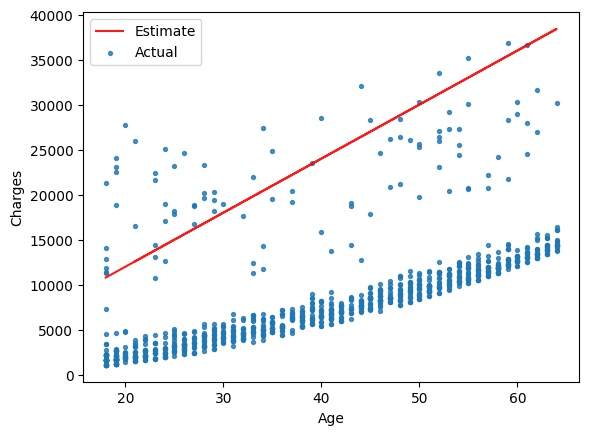

In [ ]:
try_parameters(non_smoker_df, 600, 20)

 Лінія моделі (Estimate) показує загальну тенденцію зростання медичних витрат із віком.
Однак вона явно переоцінює витрати для багатьох молодших користувачів і недооцінює для деяких старших користувачів.

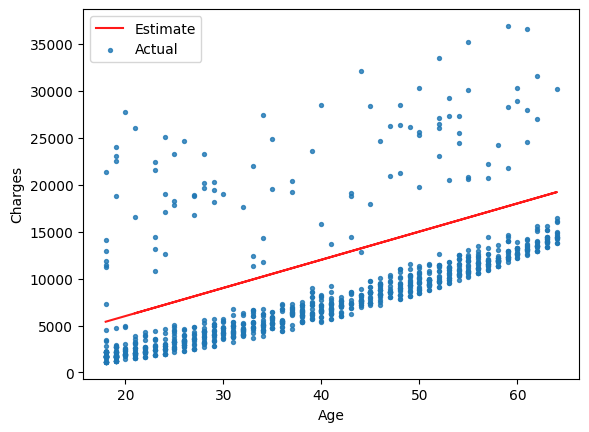

In [ ]:
try_parameters(non_smoker_df, 300, 5)

Однак лінія значно недооцінює витрати для старших користувачів і не враховує широкий розкид даних у верхніх групах.

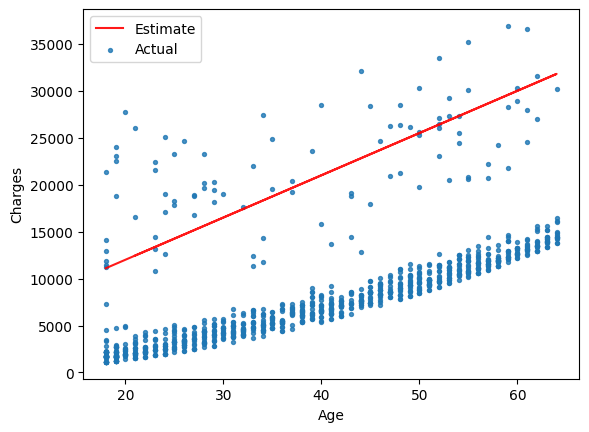

In [ ]:
try_parameters(non_smoker_df, 450, 3000)

Лінія краще підходитиме для середнього діапазону витрат, ніж попередні спроби.


**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
targets = non_smoker_df['charges']

In [ ]:
predicted_1 = estimate_charges(non_smoker_df.age, 600, 20)

In [ ]:
predicted_2 = estimate_charges(non_smoker_df.age, 300, 5)

In [ ]:
predicted_3 = estimate_charges(non_smoker_df.age, 450, 3000)

In [ ]:
rmse(targets, predicted_1)

16590.194341348346

In [ ]:
rmse(targets, predicted_2)

5780.896248714801

In [ ]:
rmse(targets, predicted_3)

13393.273701630176

Найнижче значення RMSE: 5,780.90 (w=300, b=5)
Ця модель найкраще відображає тренд залежності між віком (age) та витратами (charges) серед некурців.

 **Алгоритм стратегії**
-  Вибираю стартові параметри 𝑤 та 𝑏
- Перевіряю RMSE для обраних значень.
- Змінюю 𝑤 і перевіряю RMSE знову.
- Змінюю 𝑏 і знову перевіряю RMSE.
- Рухаюсь у напрямку, де RMSE зменшується.
- Зменшую кроки для більш точного налаштування.
- Зупиняюсь, коли RMSE стабілізується і подальші зміни не дають суттєвого покращення.

Цей підхід дозволяє мені покроково вдосконалювати модель, оцінюючи кожен крок і наближаючись до оптимальних значень параметрів